<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/Linearna-Regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearna Regresija

Linearna regresija predstavlja model ma≈°inskog uƒçenja koji je pogodan za modelovanje linearnih odnosa medju promenjivama.
Ona predstavlja specijalan sluƒçaj linearnog modela gde je broj nezavisnih promenjivih 1. Nezavisne promenjive su one na osnovu kojih treba dati predikciju vrednosti zavisne.

Kada je reƒç o linearnoj regresiji, cilj nam je da, sa ≈°to manjom gre≈°kom, predvidimo vrednost zavisne na osnovu vrednosti nezavisne promenjive.

Su≈°tinski, model linearne regresije jeste linearna funkcija sledeƒáeg oblika:

\begin{equation}
  y = Œ± + Œ≤x
\end{equation}

Ova jednaƒçina opisuje pravu sa koeficijentom pravca Œ≤ i iseƒçkom na y osi Œ±.

Svaka taƒçka iz skupa podataka mo≈æe biti prikazana kao
\begin{equation}
  y_i = Œ± + Œ≤x_i + ùúÄ_i
\end{equation}

gde $ùõÜ_i$ predstavlja gre≈°ku. $ùõÜ_i$ se takoƒëe zove i **rezidual** i, kada je linearna regresija u pitanju, pretpostavlja se da ima normalnu raspodelu sa $\mu = 0$.

Cilj obuƒçavanja ovog modela jeste da se naƒëu optimalne vrednosti parametara $Œ±$ i $Œ≤$, takvi da, na izvestan naƒçin, minimizuju gre≈°ku.

Op≈°ti oblik linearnog modela glasi
\begin{equation}
 y = Œ≤_nx_n + Œ≤_{n-1}x_{n-1} + ‚ãØ + Œ≤_2x_2 + Œ≤_1x_1 + Œ≤_0
\end{equation}

gde su {$x_n \cdots x_1$} nezavisne promenjive, a $y$ zavisna promenjiva. Skup {$\beta_0 \cdots \beta_n$} predstavlja parametre modela.

### Generisanje sintetiƒçkog skupa podataka

Kako bismo ilustrovali moƒá linearne regresije, bolje je da sinteti≈°emo skup podataka koji je ima sve osobine koje su potrebne za primenu linearne regresije

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Pretpostavljamo da prava koja optimalno opisuje podatke jeste $y = 2.5x + 4$. Gre≈°ka $ùõÜ$ predstavlja varijansu u promenjivoj $y$ koja se ne mo≈æe objasniti promenjivom $x$.

In [ ]:
# pretpostavimo linearnu zavisnost izmedju promenjivih
k = 2.5
n = 4
x = np.random.uniform(0, 50, size=1000)
eps = np.random.normal(scale=10, size=1000)
y_hat = k * x + n
y = k * x + n + eps


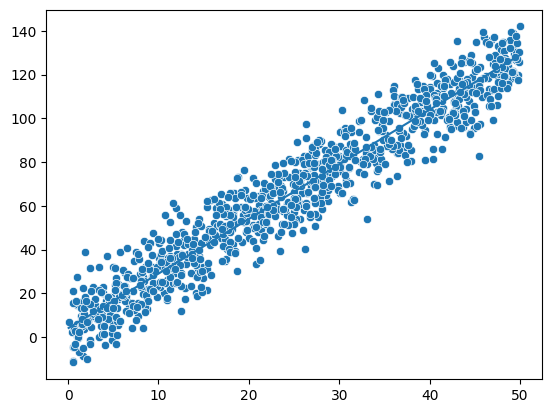

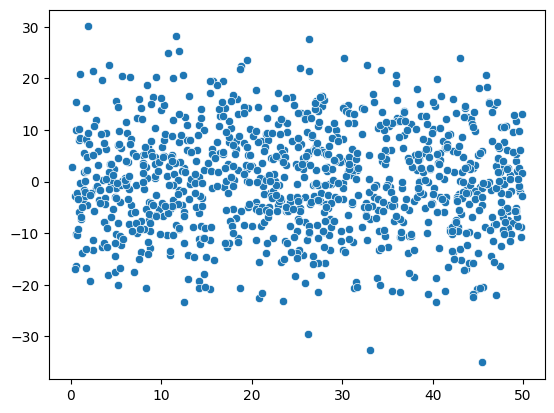

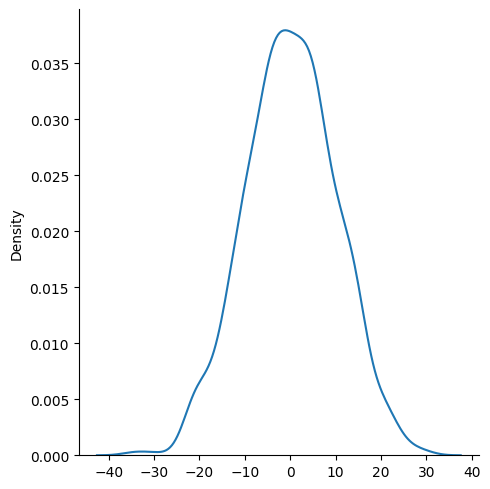

In [ ]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_hat)
plt.show()
ax = sns.scatterplot(x=x, y=eps, )
plt.show()
sns.displot(eps,kind="kde")

Prvi grafik prikazuje stvarne podatke, i liniju koja najbolje opisuje podatke.
Drugi grafik predstavlja vrednost $ùõÜ_i$ za svako $x_i$. Treci grafik predstavlja raspodelu reziduala.

#### Zavisnost sume kvadrata reziduala od koeficijenta pravca $k$

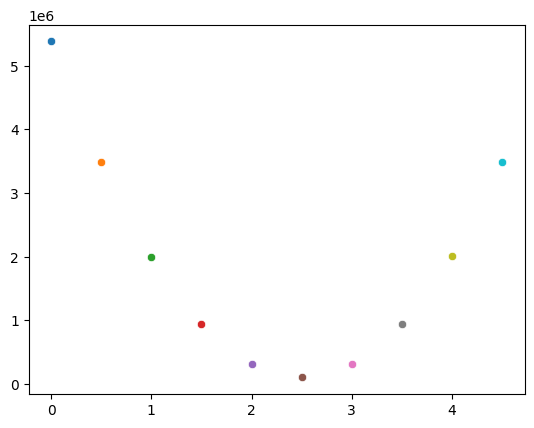

In [ ]:
ks = [x / 2.0 for x in range(0, 10)]
n = 4

for k in ks:
    y_hat = k * x + n
    residuals = (y - y_hat)**2
    rss = residuals.sum()
    sns.scatterplot(x=k, y=[rss])


#### Zavisnost sume kvadrata reziduala od parametra $n$

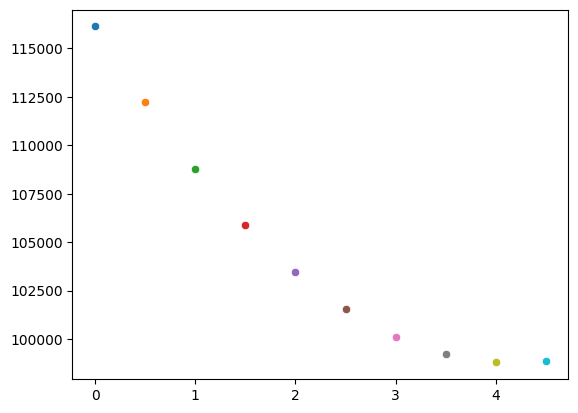

In [ ]:
plt.show()

ns = [x / 2.0 for x in range(0, 10)]
k = 2.5

for n in ns:
    y_hat = k * x + n
    residuals = (y - y_hat)**2
    rss = residuals.sum()
    sns.scatterplot(x=n, y=[rss])

Sa prethodnih grafika se vidi da vrednosti $k = 2.5$ i $n = 4$ predstavljaju najbolje parametre modela, tj. za te parametre, optimizacioni kriterijum ima minimalne vrednosti.

\usepackage{amsmath}
## Odreƒëivanje optimalnih parametara modela

S obzirom da imamo samo dva parametra od kojih direktno zavisi suma kvadrata reziduala, mo≈æemo analitiƒçki izraƒçunati optimalne parametre $Œ±$ i $Œ≤$.

Suma kvadrata reziduala se mo≈æe prikazati kao
\begin{equation}
RSS = ‚àë_i(y_i- \hat{y_i})^2 = ‚àë_i(y_i - (Œ± + Œ≤x_i))^2
\end{equation}

Podsetimo se izvoda slozene funkcije:
\begin{equation}
\frac{d}{dx}f(g(x)) = f'(g(x))g'(x)
\end{equation}

Ukoliko trazimo parcijalni izvod po $Œ±$:
\begin{align}
  \frac{\partial}{\partial \alpha} ‚àë(y_i - (Œ± + Œ≤x_i))^2 & = ‚àë \frac{\partial}{\partial \alpha} (y_i - (Œ± + Œ≤x_i))^2 \\
  & = ‚àë 2(y_i - (Œ± + Œ≤x_i))(-1) \\
  & = -2‚àë(y_i - (Œ± + Œ≤x_i))
\end{align}

A kada trazimo parcijalni izvod po $\beta$:
\begin{align}
  \frac{\partial}{\partial \beta} ‚àë(y_i - (Œ± + Œ≤x_i))^2 & = ‚àë \frac{\partial}{\partial \beta} (y_i - (Œ± + Œ≤x_i))^2 \\
  & = ‚àë 2(y_i - (Œ± + Œ≤x_i))(-x_i) \\
  & = -2‚àëx_i(y_i - (Œ± + Œ≤x_i))
\end{align}

Zelimo da znamo za koje vrednosti $\alpha$ i $\beta$ funkcija RSS ima minimalnu vrednost. Minimalna vrednost sume iskljucivo pozitivnih vrednosti je 0. Intuitivno, RSS vrednost ne bi trebala da ima lokalne maksimume. Stoga, ako nadjemo vrednosti $\alpha$ i $\beta$ takve da su parcijalni izvodi 0, mora da smo nasli minimum.

Znaci resavamo za $\alpha$ i $\beta$ sistem
\begin{align*}
  -2‚àë(yi-(Œ±+Œ≤xi)) & = 0 \\
  -2‚àëxi(yi-(Œ±+Œ≤xi)) & = 0 \\
  \hline
  ‚àë(yi-(Œ±+Œ≤xi)) & = 0 \\
  ‚àëxi(yi-(Œ±+Œ≤xi)) & = 0 \\
\end{align*}

Nakon resavanja sistema dobijamo:
\begin{equation}
\beta = \frac{\sum (x_i - \bar x)(y_i - \bar y )}{\sum (x_i - \bar x )^2} \\
\alpha = \bar y - \beta \bar x
\end{equation}

Gde $\bar x$ i $\bar y$ predstavljaju srednje vrednosti tih promenjivih. Intuitivno, treba da je jasno da parametri $\alpha$ i $\beta$ zavise iskljucivo od skupa podataka.



## Praktiƒçni primer

Import neophodnih biblioteka


*   **pandas** za ucitavanje i obradu tabelarnih podataka
*   **seaborn** za crtanje grafika
*   **pyplot** za finiju kontrolu nad graficima



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Ucitavanje skupa podataka

In [ ]:
data = pd.read_csv("insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Eksploratorna analiza podataka

Ovaj korak je potreban kako bismo bolje razumeli strukturu podataka i eventualno otklonili nedostatke.
Dobra eksploratorna analiza podrazumeva:


1.   Razumevanje domena problema
2.   Razumevanje tehnika vizuelizacije



### Vizuelizacija

Prirodu podataka je najlakse uvideti koriscenjem grafika. Dobro osmisljeni grafici mogu pomoci da se utvrde trendovi i zavisnosti koje nije lako uociti jednostavnim tabelarnim pregledom

#### Cena usluga u zavisnosti od godina, bmi i broja dece

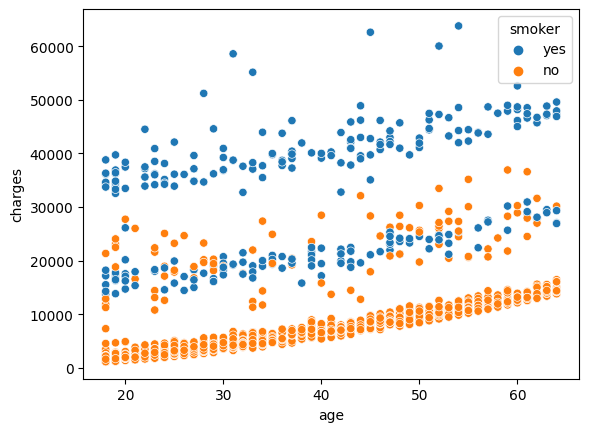

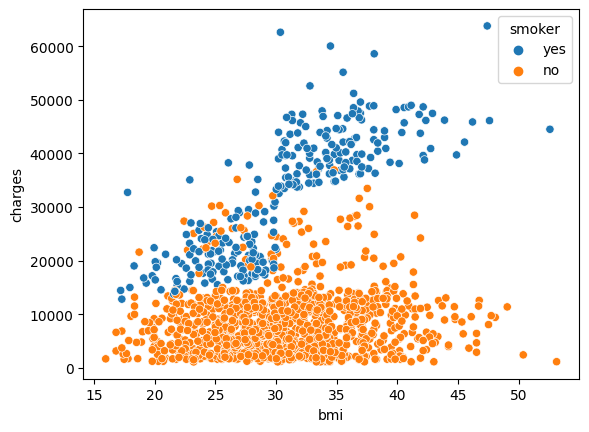

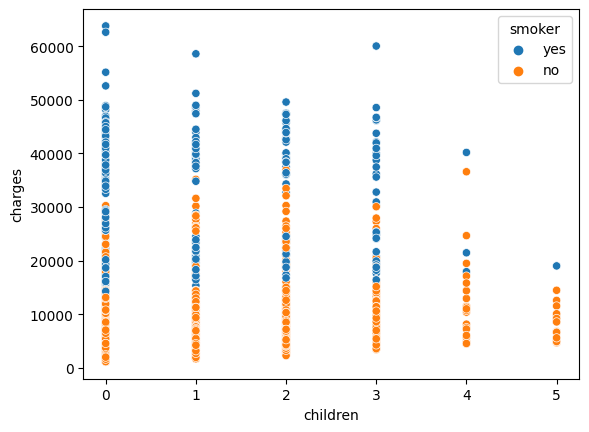

In [ ]:
sns.scatterplot(data, x=data['age'], y=data['charges'], hue=data['smoker'])
plt.show()
sns.scatterplot(data, x=data['bmi'], y=data['charges'], hue=data['smoker'])
plt.show()
sns.scatterplot(data, x=data['children'], y=data['charges'], hue=data['smoker'])
plt.show()

#### Tumaƒçenje grafika

Jasno se vidi da nepu≈°aƒçi imaju ni≈æe cene osiguranja nego pu≈°aƒçi. Te tvrdjne mo≈æemo dokazati i statistiƒçki tako ≈°to ƒáemo videti kakva je raspodela cena kod pu≈°aƒça i nepu≈°aƒça.

In [ ]:
pusaci = data.loc[data['smoker'] == 'yes']
nepusaci = data.loc[data['smoker'] == 'no']
print(pusaci.charges.mean(), pusaci.charges.std())
print(nepusaci.charges.mean(), nepusaci.charges.std())

32050.23183153284 11541.547175589121
8434.268297856204 5993.7818191949345


Iste tvrdnje se mogu zakljuƒçiti i sa sledeƒáih grafika

<Axes: xlabel='smoker', ylabel='charges'>

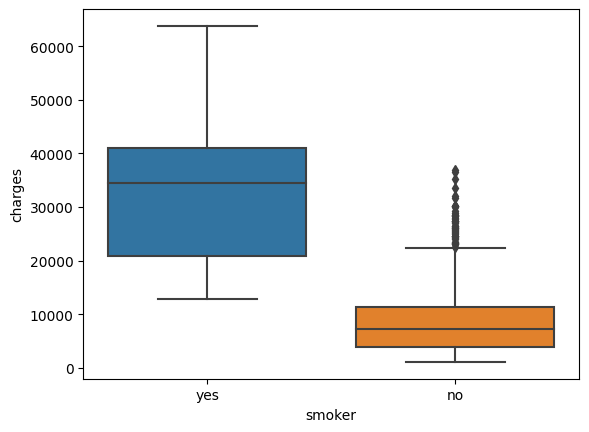

In [ ]:
sns.boxplot(data, x='smoker', y='charges')

#### Cena usluge u zavisnosti od regiona

Nije potrebno domensko znanje da bismo znali da razliciti regioni velikih dr≈æava poput SAD imaju razliƒçite ≈æivotne standarde. Stoga ima smisla porediti raspodele cena u odnosu na regione.

<Axes: xlabel='region', ylabel='charges'>

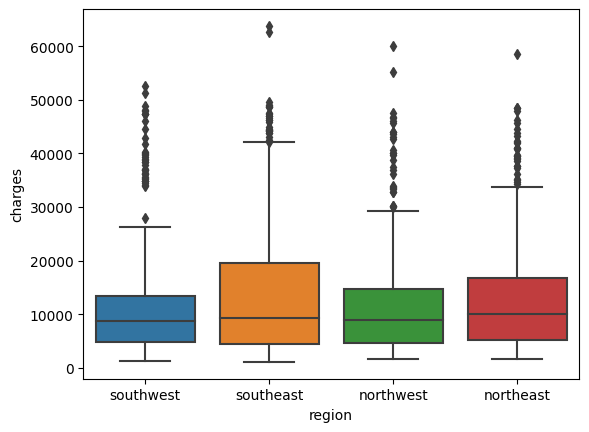

In [ ]:
sns.boxplot(data, x='region', y='charges')

#### Tumaƒçenje grafika

Na osnovu grafika se ne mo≈æe na prvi pogled zakljuƒçiti da postoji znaƒçajna razlika u ceni.

<ipython-input-27-04c2686bb54b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

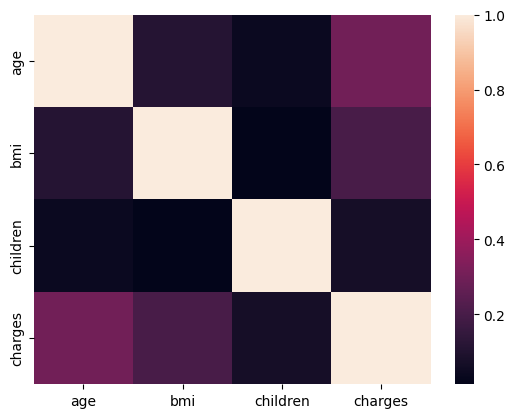

In [ ]:
cor = data.corr()
sns.heatmap(cor)

## Trening test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

print(len(train))
print(len(test))

219
55


## Definicija linearnog modela i treniranje

In [ ]:
from sklearn.linear_model import LinearRegression
# definicija modela
model = LinearRegression()
# treniranje (fitovanje) modela
model.fit(train[['age', 'bmi', 'children']], train['charges'])



LinearRegression()

## Testiranje modela

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_true = test['charges']
y_pred = model.predict(test[['age','bmi', 'children']])

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)


6606.006779748288


In [ ]:
!git commit -m "Dodatna objasnjenja"

fatal: not a git repository (or any of the parent directories): .git
